<a href="https://colab.research.google.com/github/Ermi1223/Regression_Model_House_Price/blob/main/Regression_Mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Housing Price Prediction using Regression Models**

**Introduction**

In this notebook, i will build and evaluate regression models to predict housing prices using the california Housing Dataset. i will:

1. Load and preprocess the dataset.

2. Train a Linear Regression and Random Forest Regressor.

3. Tune hyperparameters for Random Forest using Optuna.

4. Compare model performance using RMSE and R² score.



**Step 1: Install Necessary Libraries**

📌 I Install **Optuna**

 Why Use Optuna?
1. Automates Hyperparameter Tuning: Instead of manually searching for the best parameters, Optuna automates the process.

2. Efficient Search: Uses smarter techniques (like TPE) rather than brute-force methods like Grid Search.

3. Visualization Tools: Provides tools to analyze and compare different hyperparameter trials.

4. Pruning Unpromising Trials: Stops bad trials early to save computational resources.


In [ ]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 15.2 MB/s eta 0:00:00


**Step 2: Import Necessary Libraries**

📌 I import essential libraries for data processing, model training, hyperparameter tuning, and evaluation.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import optuna
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt


**Step 3: Load the Dataset**

📌 I use the fetch_california_housing() dataset from Scikit-learn, which contains information about housing prices in California.

🔹 Features in the dataset:

1. MedInc - Median income in the area

2. HouseAge - Average age of houses

3. AveRooms - Average number of rooms per dwelling

4. AveBedrms - Average number of bedrooms per dwelling

5. Population - Population in the area

6. AveOccup - Average household occupancy

7. Latitude - Latitude of the area

8. Longitude - Longitude of the area

In [ ]:
# Step 3: Load the dataset
data = fetch_california_housing()
X = data.data
y = data.target


**Step 4: Split the Dataset**

📌 I split the dataset into 80% training data and 20% testing data.

In [ ]:
# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Feature Scaling**

📌 I standardize the dataset using StandardScaler() to improve model performance.

In [ ]:
# Step 5: Feature scaling (Standardizing the data for better model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Step 6: Train Regression Models**

**6.1 Linear Regression**

📌 I train a simple linear regression model to establish a baseline.

In [ ]:
# Step 6: Train models

# 6.1 Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lr = lin_reg.predict(X_test_scaled)

**6.2 Random Forest (Baseline)**

📌 I train a Random Forest Regressor as a more robust alternative.

In [ ]:
# 6.2 Random Forest Model (Baseline)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

**Step 7: Hyperparameter Tuning with Optuna**

📌 I optimize the Random Forest model using Optuna to find the best hyperparameters for improved performance.

**7.1 Define Objective Function**

📌 The objective function tests different hyperparameter values to minimize RMSE.

In [ ]:
# Step 7: Hyperparameter tuning using Optuna for Random Forest
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)

    rf = RandomForestRegressor(n_estimators=n_estimators,
                               max_depth=max_depth,
                               min_samples_split=min_samples_split,
                               random_state=42)
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

**7.1 Run Hyperparameter Optimization**

📌 I run 50 trials to find the best model parameters.

In [ ]:
# Optimize hyperparameters using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

**7.3 Train the Best Model**

📌 I extract the best hyperparameters and train the optimized model.

In [ ]:
# Get best hyperparameters and train the best model
best_params = study.best_params
best_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                random_state=42)
best_rf.fit(X_train_scaled, y_train)
y_pred_best_rf = best_rf.predict(X_test_scaled)

[I 2025-03-22 08:53:02,996] A new study created in memory with name: no-name-66f4422f-9092-4785-affa-0c7e68fed69d
[I 2025-03-22 08:53:34,529] Trial 0 finished with value: 0.5062528551117113 and parameters: {'n_estimators': 148, 'max_depth': 17, 'min_samples_split': 4}. Best is trial 0 with value: 0.5062528551117113.
[I 2025-03-22 08:53:51,070] Trial 1 finished with value: 0.5440290541483724 and parameters: {'n_estimators': 152, 'max_depth': 10, 'min_samples_split': 8}. Best is trial 0 with value: 0.5062528551117113.
[I 2025-03-22 08:54:06,243] Trial 2 finished with value: 0.5106371392468211 and parameters: {'n_estimators': 106, 'max_depth': 15, 'min_samples_split': 5}. Best is trial 0 with value: 0.5062528551117113.
[I 2025-03-22 08:54:19,900] Trial 3 finished with value: 0.5316333080529153 and parameters: {'n_estimators': 119, 'max_depth': 11, 'min_samples_split': 8}. Best is trial 0 with value: 0.5062528551117113.
[I 2025-03-22 08:54:33,377] Trial 4 finished with value: 0.53092329503

**Step 8: Evaluate Models**

📌 I use RMSE (Root Mean Squared Error) and R² score to evaluate model performance.

In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest (Baseline)", y_test, y_pred_rf)
evaluate_model("Random Forest (Tuned)", y_test, y_pred_best_rf)


Linear Regression - RMSE: 0.75, R²: 0.58
Random Forest (Baseline) - RMSE: 0.51, R²: 0.81
Random Forest (Tuned) - RMSE: 0.50, R²: 0.81


**Step 9: Save and Download the Best Model**

📌 I save the best Random Forest model using joblib for future use.

In [ ]:
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

In [ ]:
from google.colab import files
files.download('best_random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Step 10: Feature Importance Visualization**

📌 I plot the feature importance of the tuned Random Forest model.

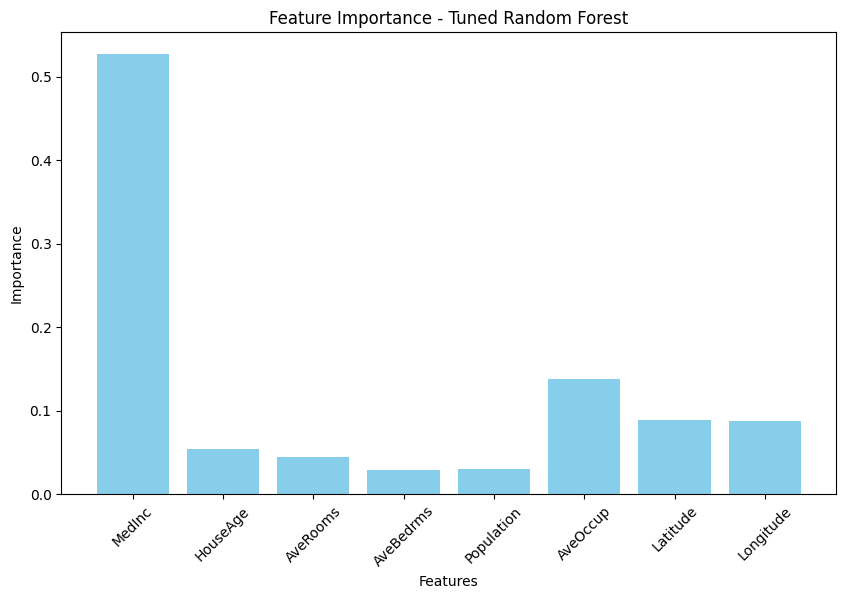

In [ ]:
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(data.feature_names, feature_importances, color='skyblue')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Tuned Random Forest")
plt.xticks(rotation=45)
plt.show()
